# Global Well-Being Prediction Using Development Indicators
## Objective
The main goal of this project is to predict the global well-being of countries based on a combination of socioeconomic, governance, and subjective well-being indicators. The project leverages data from the World Happiness Report from 2005 to 2023, integrating various factors such as economic conditions, social support, governance, health, and individual perceptions to predict overall happiness and life satisfaction across nations.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
df = pd.read_csv('Socioeconomic_Governance_and_Happiness_Metrics.csv')

In [4]:
df.head()

,Country,Region,Year,Log GDP per capita,Log GNI per capita,GNI Classification,Total Population,Population Growth Rate (%),Population Growth,Voice and Accountability,Political Stability,Government Effectiveness,Regulatory Quality,Rule of Law,Internet Penetration,Social Support,Healthy Life Expectancy,Child Mortality Rate,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Positive Affect,Negative Affect,Life Ladder Score
0,Afghanistan,South Asia,2008,7.350,5.913503,Low Income,26427199,2.0,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.451,50.5,High,0.718,0.164,0.882,0.414,0.258,3.724
1,Afghanistan,South Asia,2009,7.509,6.131226,Low Income,27385307,3.6,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.552,50.8,High,0.679,0.187,0.850,0.481,0.237,4.402
2,Afghanistan,South Asia,2010,7.614,6.272877,Low Income,28189672,2.9,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.539,51.1,High,0.600,0.118,0.707,0.517,0.275,4.758
3,Afghanistan,South Asia,2011,7.581,6.309918,Low Income,29249157,3.7,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.521,51.4,High,0.496,0.160,0.731,0.480,0.267,3.832
4,Afghanistan,South Asia,2012,7.661,6.461468,Low Income,30466479,4.1,High Growth,Oppressed,Conflict-Prone,Inefficient,Restrictive,Lawless,Low Penetration,0.521,51.7,High,0.531,0.234,0.776,0.614,0.268,3.783


In [5]:
df.shape

(2363, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2363 non-null   object 
 1   Region                        2363 non-null   object 
 2   Year                          2363 non-null   int64  
 3   Log GDP per capita            2335 non-null   float64
 4   Log GNI per capita            2338 non-null   float64
 5   GNI Classification            2342 non-null   object 
 6   Total Population              2363 non-null   int64  
 7   Population Growth Rate (%)    2363 non-null   float64
 8   Population Growth             2363 non-null   object 
 9   Voice and Accountability      2363 non-null   object 
 10  Political Stability           2363 non-null   object 
 11  Government Effectiveness      2363 non-null   object 
 12  Regulatory Quality            2363 non-null   object 
 13  Rul

In [7]:
df.drop(columns='Year').describe().round(2)

,Log GDP per capita,Log GNI per capita,Total Population,Population Growth Rate (%),Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Positive Affect,Negative Affect,Life Ladder Score
count,2335.00,2338.00,2.363000e+03,2363.00,2350.00,2300.00,2327.00,2282.00,2238.00,2339.00,2347.00,2363.00
mean,9.40,8.66,5.210266e+07,1.26,0.81,63.40,0.75,0.00,0.74,0.65,0.27,5.48
std,1.15,1.47,1.660397e+08,1.47,0.12,6.84,0.14,0.16,0.18,0.11,0.09,1.13
min,5.53,4.87,2.971730e+05,-14.30,0.23,6.72,0.23,-0.34,0.04,0.18,0.08,1.28
25%,8.51,7.45,5.394906e+06,0.40,0.74,59.20,0.66,-0.11,0.69,0.57,0.21,4.65
50%,9.50,8.64,1.223034e+07,1.20,0.83,65.10,0.77,-0.02,0.80,0.66,0.26,5.45
75%,10.39,9.87,3.793227e+07,2.10,0.90,68.55,0.86,0.09,0.87,0.74,0.33,6.32
max,11.68,11.56,1.428628e+09,13.50,0.99,74.60,0.98,0.70,0.98,0.88,0.70,8.02


- Outliers, missing values, and skewness are identified from the summary statistics.

#### Handling Missing Values

In [10]:
null_count = df.isnull().sum()
print('Total Missing Values : ')
null_count = null_count[null_count > 0]
null_count

Total Missing Values : 


Log GDP per capita               28
Log GNI per capita               25
GNI Classification               21
Internet Penetration            113
Social Support                   13
Healthy Life Expectancy          63
Child Mortality Rate            138
Freedom to Make Life Choices     36
Generosity                       81
Perceptions of Corruption       125
Positive Affect                  24
Negative Affect                  16
dtype: int64

- From the above `info()` and `isnull()`, we can see there are some missing values in our dataset.

- This can be addressed via imputation techniques and regression models.

In [12]:
from pyampute.exploration.mcar_statistical_tests import MCARTest

categorical_cols = df.select_dtypes(include='O').columns.to_list()
df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

mcar = MCARTest()
p_value = mcar.little_mcar_test(df_encoded)

if p_value < 0.05:
    print(f'P_Value : {p_value}\nThe Missing Values are not Completely At Random it follows some pattern')
else:
    print(f'P_Value : {p_value}\nThe Missing Values are Completely At Random (MCAR)')

P_Value : 1.0
The Missing Values are Completely At Random (MCAR)


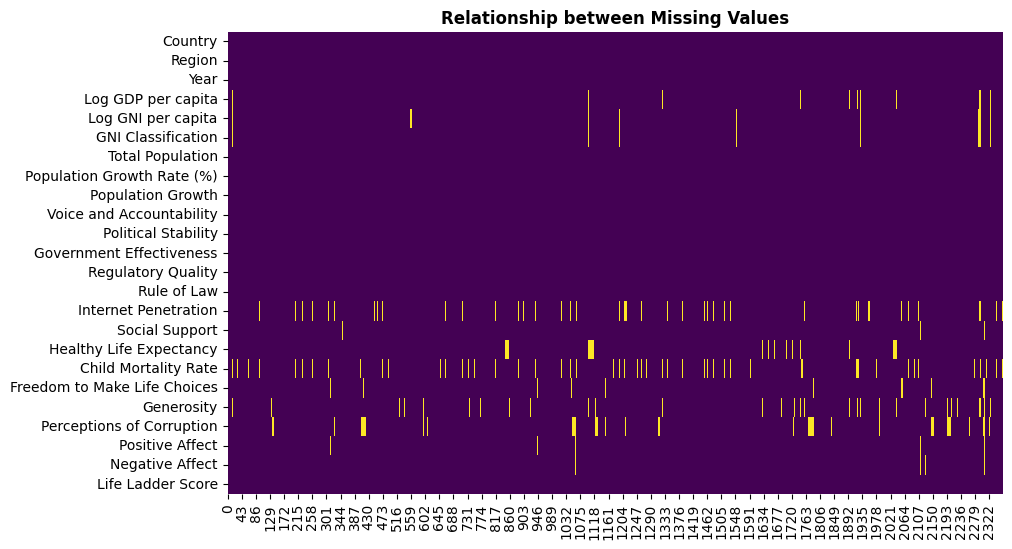

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull().T, cbar=False, cmap='viridis')
plt.title('Relationship between Missing Values', fontweight='bold')
plt.show()

- The heatmap shows that the **missing values are completely at random**.

- This is also proven by the **Little MCAR Statistical Test** (p_value > 0.05).

#### Mode Imputation for Categorical Features

In [16]:
def fill_with_mode(data):
    for col in categorical_cols:
        mode = data[col].mode()
        if not mode.empty:
            data[col] = data[col].fillna(mode[0])
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
    return data

df = df.groupby(by=['Country']).apply(fill_with_mode).reset_index(drop=True)

- As we have data for each country from 2005 - 2023, grouped the data by Country and fill the highest occurrence of a data to the respective missing value.

#### Machine Learning Imputation for Numerical Features

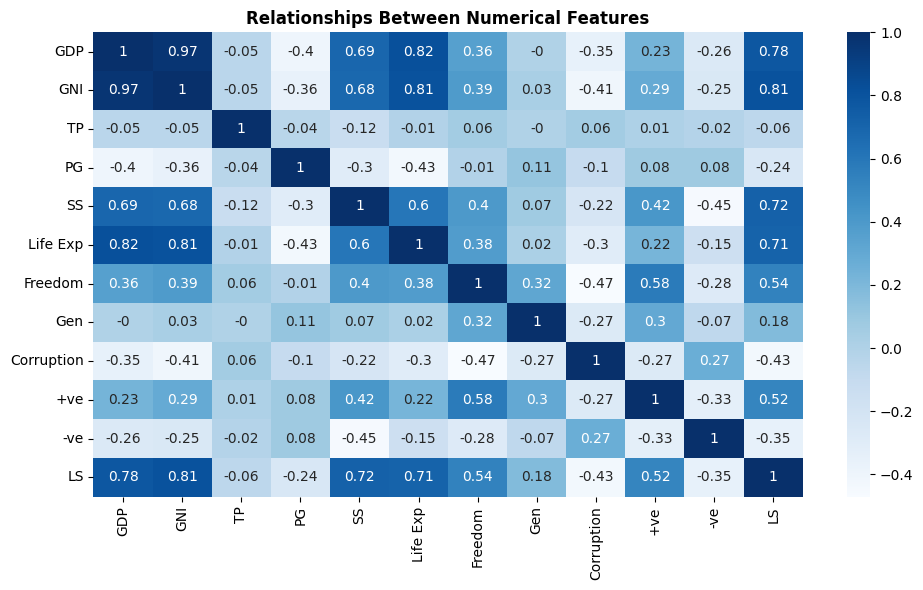

In [19]:
numerical_cols = df.drop(columns='Year').select_dtypes(exclude='O').columns.to_list()
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr().round(2), cmap='Blues', annot=True,
     xticklabels=['GDP', 'GNI', 'TP', 'PG', 'SS', 'Life Exp', 'Freedom', 'Gen', 'Corruption', '+ve', '-ve', 'LS'],
     yticklabels=['GDP', 'GNI', 'TP', 'PG', 'SS', 'Life Exp', 'Freedom', 'Gen', 'Corruption', '+ve', '-ve', 'LS'])
plt.title('Relationships Between Numerical Features', fontweight='bold')
plt.tight_layout()

- The dataset has complex interdependencies between features and have mix of categorical and continuous features. Need a more sophisticated imputation method to account for intricate patterns in the data.

- Iterative Imputer will be the right choice rather than going for KNNImputer.

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

encoder = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoder[col] = le

prev_data = None
model = RandomForestRegressor(random_state=42)

for max_iter in range(10, 21, 5):
    imputer = IterativeImputer(estimator=model, max_iter=max_iter, random_state=42)
    df_imputed = imputer.fit_transform(df)
    
    if prev_data is not None:
        print(f'r2_score for max_iter {max_iter} : {r2_score(df_imputed, prev_data)}')
        print(f'mean_absolute_error for max_iter {max_iter} : {mean_absolute_error(df_imputed, prev_data)}')
        print(f'mean_squared_error for max_iter {max_iter} : {mean_squared_error(df_imputed, prev_data)}\n')
        
    prev_data = df_imputed

r2_score for max_iter 15 : 1.0
mean_absolute_error for max_iter 15 : 0.0
mean_squared_error for max_iter 15 : 0.0

r2_score for max_iter 20 : 1.0
mean_absolute_error for max_iter 20 : 0.0
mean_squared_error for max_iter 20 : 0.0



- The regression metrics shows equal performance for all `max_iter`. Default `max_iter` is sufficient to fill the missing values in our dataset.

In [23]:
imputer = IterativeImputer(estimator=model, random_state=42)
df_imputed = imputer.fit_transform(df)

df = pd.DataFrame(df_imputed, columns=df.columns.to_list())

for col in categorical_cols:
    df[col] = encoder[col].inverse_transform(df[col].astype(int))

df.isnull().sum().sum()

0

### Exploratory Data Analysis (EDA)
#### Univariate Analysis
#### Distribution of Categorical Features

In [25]:
data = []

for col in categorical_cols:
    data.append({
        "Features": col,
        "Uniques": df[col].unique(),
        "No_of_Unique": df[col].nunique(),
    })

pd.DataFrame(data)

,Features,Uniques,No_of_Unique
0,Country,"[Afghanistan, Albania, Algeria, Angola, Argent...",164
1,Region,"[South Asia, Central and Eastern Europe, Middl...",11
2,GNI Classification,"[Low Income, Lower Middle Income, Upper Middle...",4
3,Population Growth,"[High Growth, Negative Growth, Moderate Growth...",4
4,Voice and Accountability,"[Oppressed, Limited Freedom, Empowered]",3
5,Political Stability,"[Conflict-Prone, Fragile, Peaceful]",3
6,Government Effectiveness,"[Inefficient, Developing, Efficient]",3
7,Regulatory Quality,"[Restrictive, Inconsistent, Progressive]",3
8,Rule of Law,"[Lawless, Vulnerable, Just]",3
9,Internet Penetration,"[Low Penetration, Medium Penetration, High Pen...",3


- The dataset covers 11 regions across 164 countries for the years 2005 to 2023.

In [27]:
region_shortnames = {
    'South Asia': 'S. Asia',
    'Central and Eastern Europe': 'C. & E. Europe',
    'Middle East and North Africa': 'M. East & N. Africa',
    'Latin America and Caribbean': 'Latin America',
    'Commonwealth of Independent States': 'CIS',
    'ANZ': 'ANZ',
    'Western Europe': 'W. Europe',
    'Sub-Saharan Africa': 'Sub-Saharan Africa',
    'Southeast Asia': 'S. East Asia',
    'North America': 'N. America',
    'East Asia': 'E. Asia'
}
df['Region'] = df['Region'].apply(lambda x : region_shortnames.get(x))

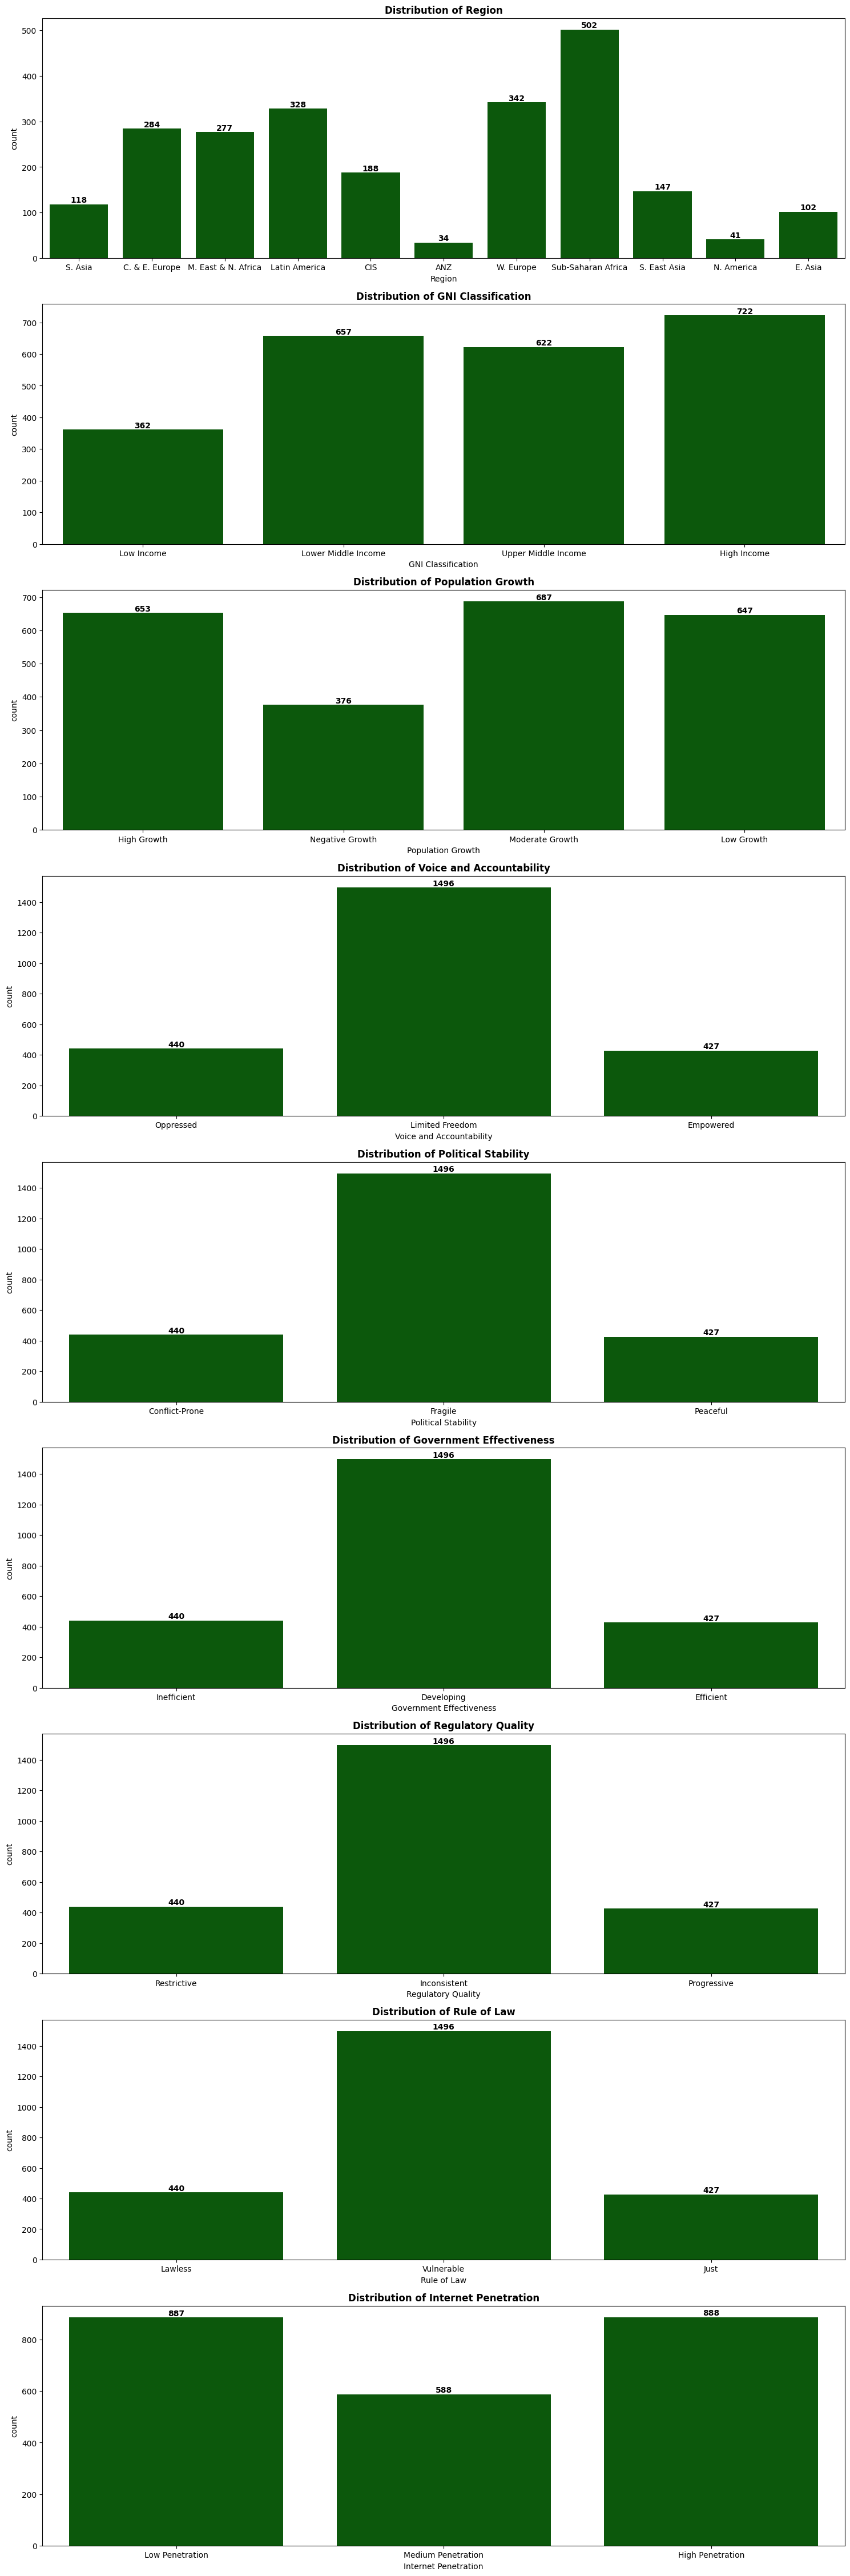

In [28]:
fig, axes = plt.subplots(10, 1, figsize=(15, 50))
axes = axes.flatten()

for col, axis in zip(categorical_cols, axes):
    ax = sns.countplot(data=df, x=col, color='darkgreen', ax=axis)
    ax.bar_label(ax.containers[0], fontweight='bold', fontsize=10)
    axis.set_title(f'Distribution of {col}', fontweight='bold')

axes[0].set_visible(False)
plt.tight_layout()

- Most the countries are having,
    - **High GNI per capital**,
    - **Moderate Population Growth**,
    - **Limited Freedom to raising voice again government**,
    - **Politically Fragile**,
    - **Developing Government**,
    - **Inconsistant Regulatory**,
    - **Vulnerable Rule of Law**, and
    - **High Internet Penetration**

#### Distribution of numerical Features using both histograms and boxplots

In [31]:
numerical_cols = df.drop(columns='Year').select_dtypes(exclude='O').columns.to_list()

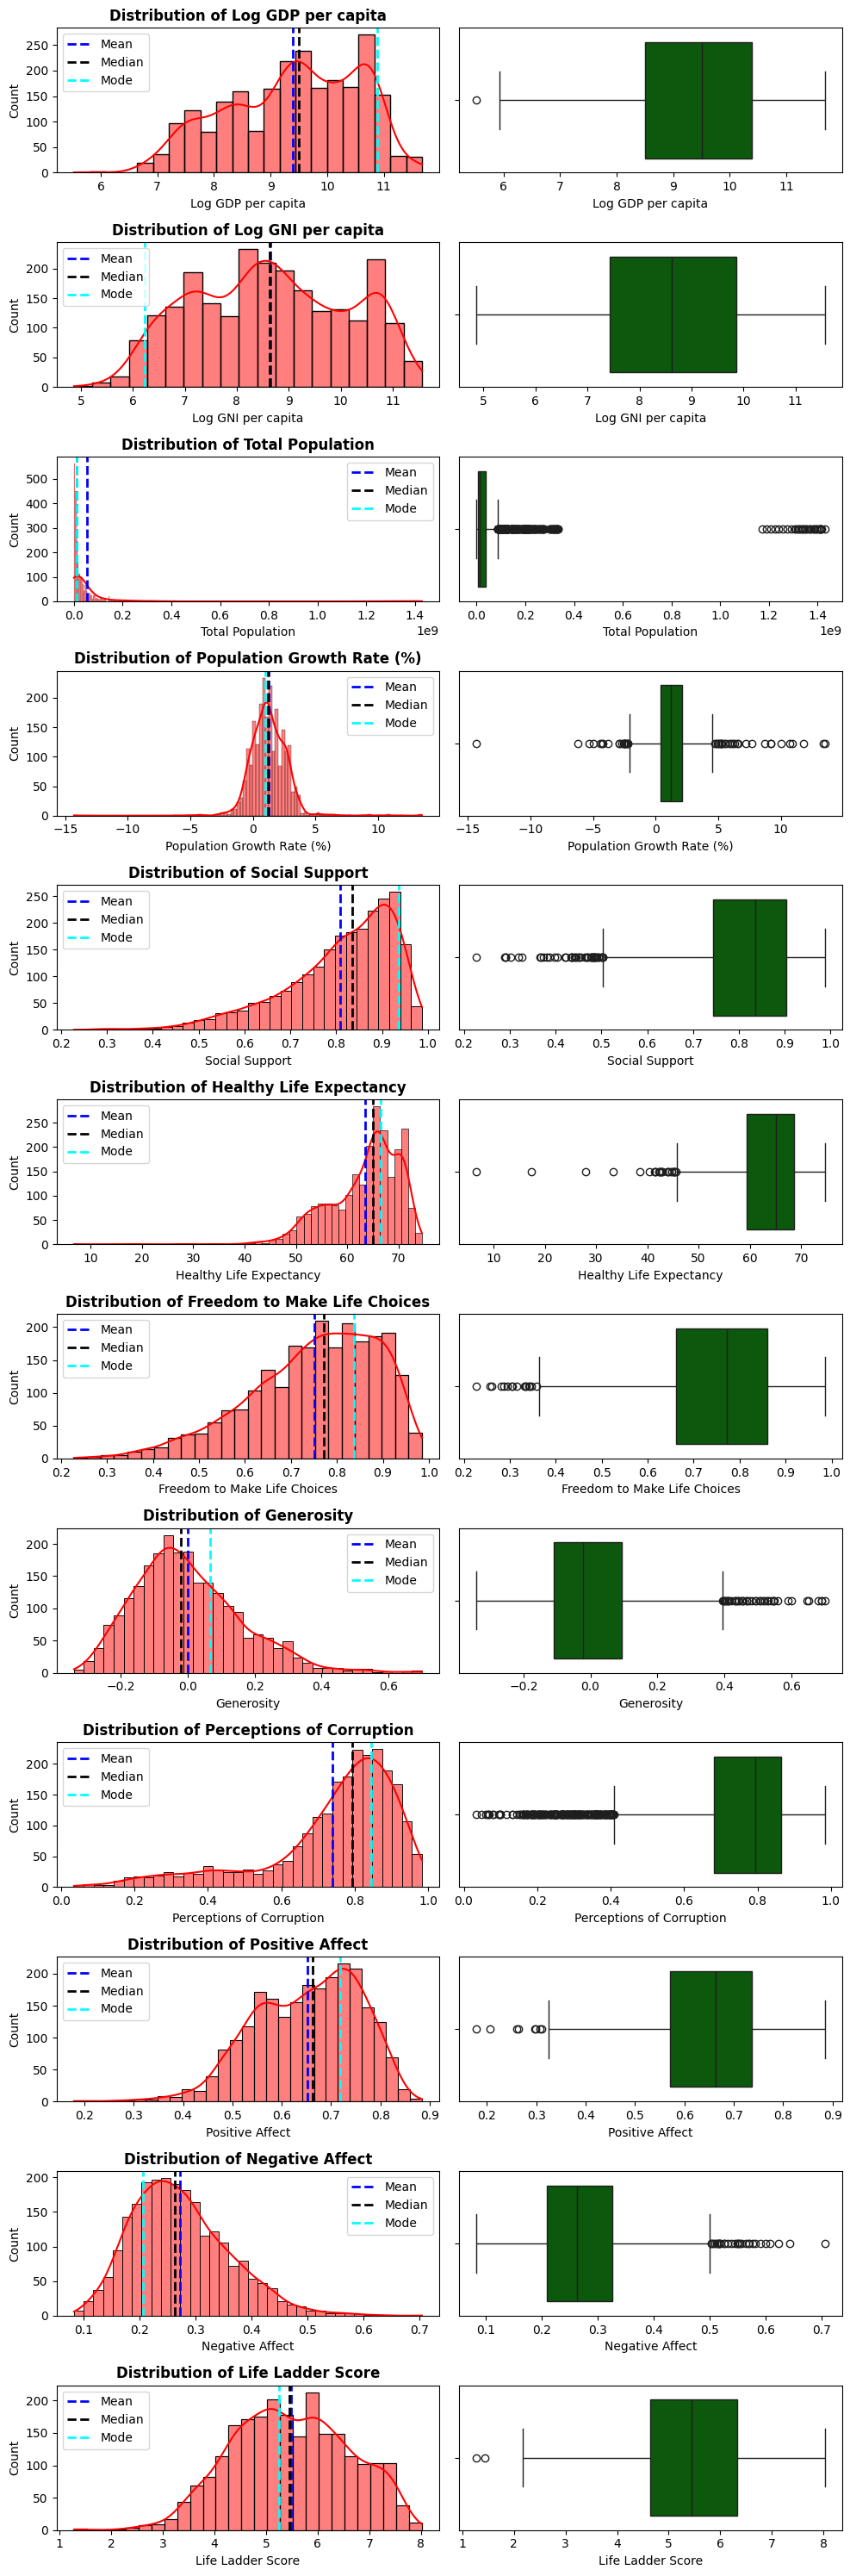

In [32]:
fig, axes = plt.subplots(12, 2, figsize=(10, 30))

for i, col in enumerate(numerical_cols):

    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0], color='red')
    axes[i, 0].axvline(x=df[col].mean(), color='blue', linewidth=2, linestyle="--", label='Mean')
    axes[i, 0].axvline(x=df[col].median(), color='black', linewidth=2, linestyle="--", label='Median')
    axes[i, 0].axvline(x=df[col].mode()[0], color='cyan', linewidth=2, linestyle="--", label='Mode')
    axes[i, 0].set_title(f'Distribution of {col}', fontweight='bold')
    axes[i, 0].legend()

    sns.boxplot(data=df, x=col, ax=axes[i, 1], color='darkgreen')

plt.tight_layout()

#### Skewness Analysis

In [34]:
df[numerical_cols].skew().round(2)

Log GDP per capita             -0.33
Log GNI per capita              0.01
Total Population                7.01
Population Growth Rate (%)      0.57
Social Support                 -1.11
Healthy Life Expectancy        -1.14
Freedom to Make Life Choices   -0.71
Generosity                      0.77
Perceptions of Corruption      -1.44
Positive Affect                -0.45
Negative Affect                 0.69
Life Ladder Score              -0.05
dtype: float64

- Outliers and high skewness have been identified in the distribution of numerical columns. Despite this, it has been decided to keep them in the analysis as they may indicate the existence of extraordinary situations in the country.

#### Bivariate Analysis

#### Relationships Between Numerical Features and Target

In [38]:
from scipy.stats import pearsonr, spearmanr

positive_corr = []
negative_corr = []

for col in numerical_cols:
    
    if col == 'Life Ladder Score':
        continue
        
    if abs(df[col].skew().round(2)) > 0.5:
        corr, p_value = spearmanr(df[col], df['Life Ladder Score'])
        
        if p_value < 0.05:
            positive_corr.append(col) if corr > 0 else negative_corr.append(col)
            
    else:
        corr, p_value = pearsonr(df[col], df['Life Ladder Score'])
        
        if p_value < 0.05:
            positive_corr.append(col) if corr > 0 else negative_corr.append(col)

- Utilised Pearsonr (features follows normal distribution) and Spearmanr (features with skewness) Correlation Test to find the numerical features which are correlated with the Life Ladder Score.

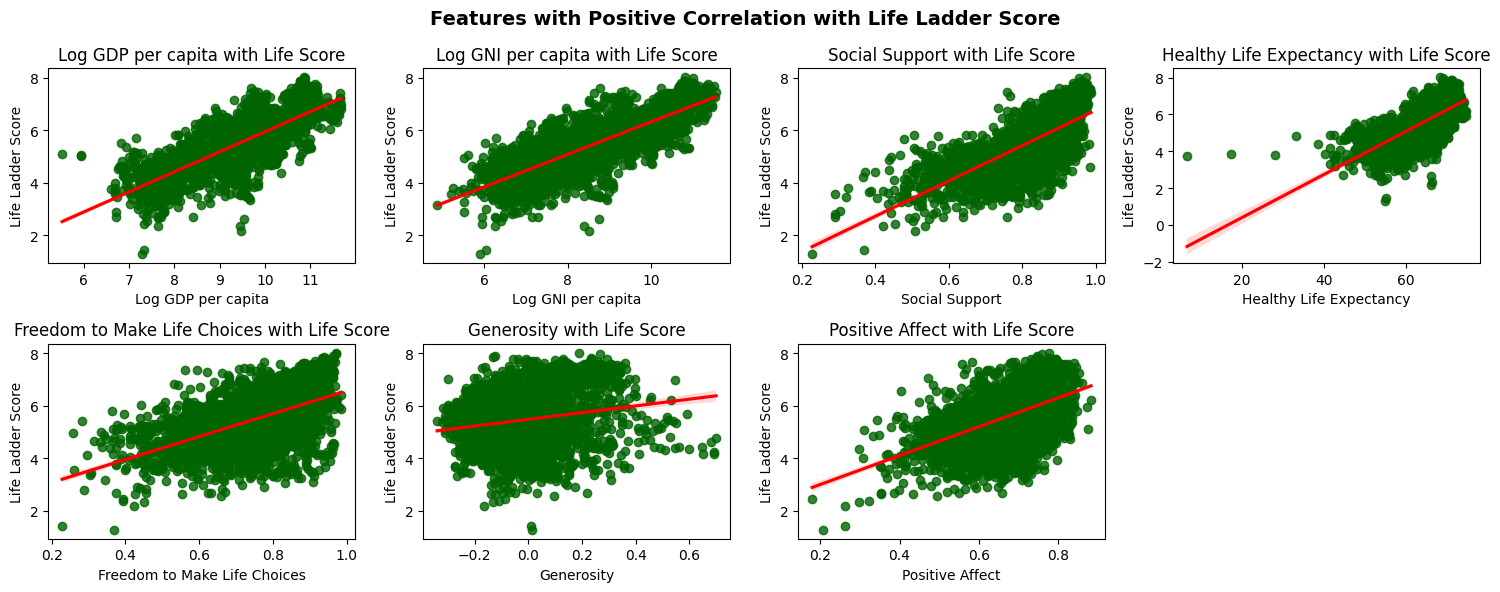

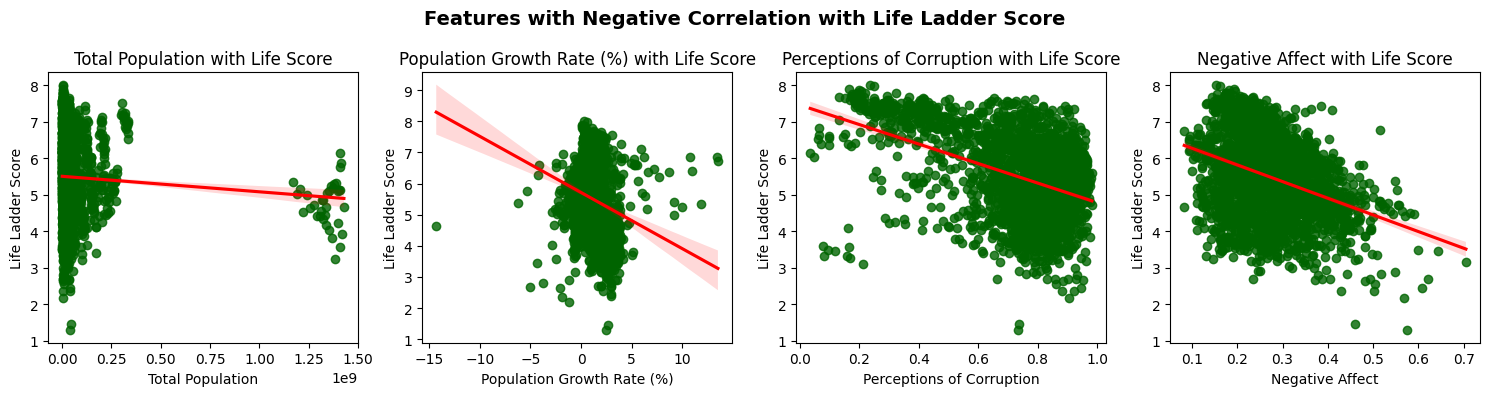

In [40]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()

for col, axis in zip(positive_corr, axes):
    sns.regplot(x=df[col], y=df['Life Ladder Score'], line_kws={"color": "red"}, ax=axis, color='darkgreen')
    axis.set_title(f'{col} with Life Score')

axes[-1].set_visible(False)
plt.suptitle('Features with Positive Correlation with Life Ladder Score', fontweight='bold', fontsize=14)
plt.tight_layout()

fig, axes = plt.subplots(1, 4, figsize=(15, 4))
axes = axes.flatten()

for col, axis in zip(negative_corr, axes):
    sns.regplot(x=df[col], y=df['Life Ladder Score'], line_kws={"color": "red"}, ax=axis, color='darkgreen')
    axis.set_title(f'{col} with Life Score')

plt.suptitle('Features with Negative Correlation with Life Ladder Score', fontweight='bold', fontsize=14)
plt.tight_layout()

- The countries with high GDP, GNI, Social Support, Life Expectancy, Freedom, Generosity, Positive Affect and with low Population, Population Growth Rate, Corruption, Negative Affect have high Life Ladder Score means people are happy.

#### Distribution of Categorical Features

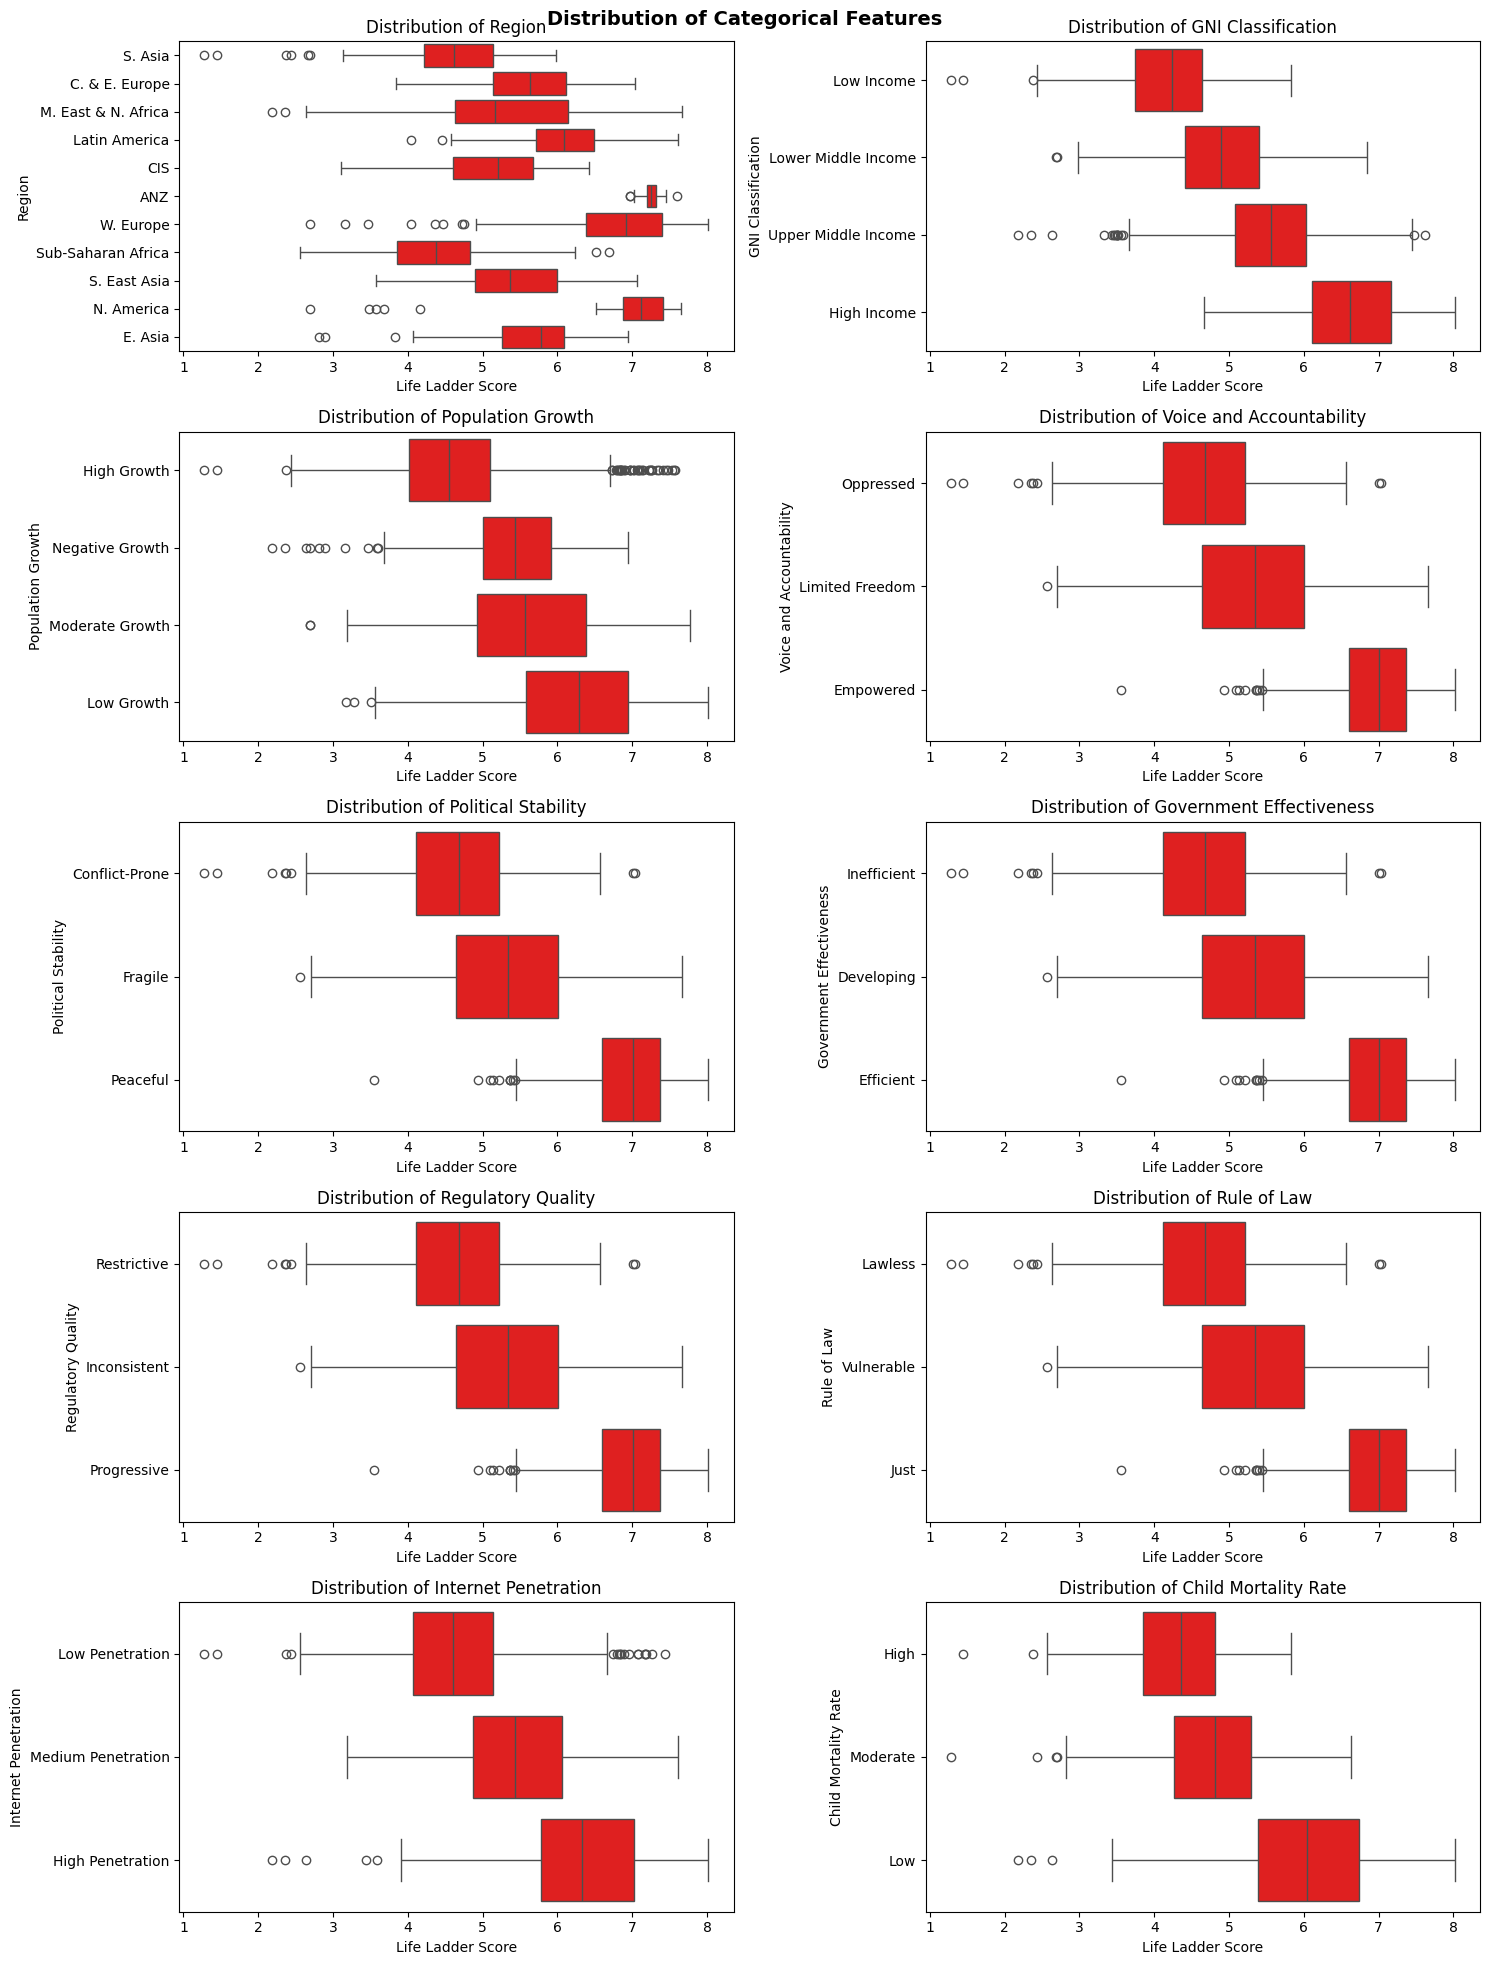

In [43]:
from scipy.stats import f_oneway

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for col, axis in zip(categorical_cols[1:], axes):
    anova_result = f_oneway(*[df[df[col] == cat]['Life Ladder Score'] for cat in df[col].unique()])
    if anova_result.pvalue < 0.05:
        sns.boxplot(data=df, x='Life Ladder Score', y=col, hue=df[col].unique, 
                    palette=['red'], legend=None, ax=axis)
        axis.set_title(f'Distribution of {col}')

plt.suptitle('Distribution of Categorical Features', fontweight='bold', fontsize=14)
plt.tight_layout()

The ANOVA test reveals that there is a significant difference in the mean of the `Life Ladder Score` for the following categorical features:

- **Region**
- **GNI Classification**
- **Population Growth**
- **Governance (Accountability, Political stability, Effective Govt., Regulatory Quality, & Rule by Law)**
- **Internet Penetration**
- **Child Mortality Rate**

1. **Higher Mean Life Ladder Score**:
   - Countries in the regions of **ANZ (Australia and New Zealand)**, **Western Europe**, and **North America** with **high GNI classification** exhibit higher happiness scores.
   
2. **Population Growth Rate**:
   - Countries with **low population growth rates** tend to have higher happiness scores.
   - **Outliers**: Some countries with high population growth rates also exhibit high happiness scores, suggesting the presence of other contributing factors (e.g., availability of facilities or resources).

3. **Governance Score**:
   - Countries with **high governance scores** (e.g., accountability, political stability, effective government, regulatory quality, and rule of law) generally show higher happiness scores.
   - **Outliers**: Some countries with high governance scores still report only average happiness scores, indicating dissatisfaction despite governance efficiency.

4. **Internet Penetration**:
   - Countries with **high internet penetration** are associated with higher happiness scores.
   - **Outliers**: Some countries with high internet penetration lack other amenities, leading to lower happiness scores.

5. **Child Mortality Rate**:
   - Countries with **low child mortality rates** tend to have higher happiness scores.

The `Life Ladder Score` is influenced by various socio-economic and governance factors, with notable trends and exceptions (outliers). These insights can guide policymakers in prioritizing areas for improvement to enhance overall happiness.

#### Distribution of Life Ladder Score across Region

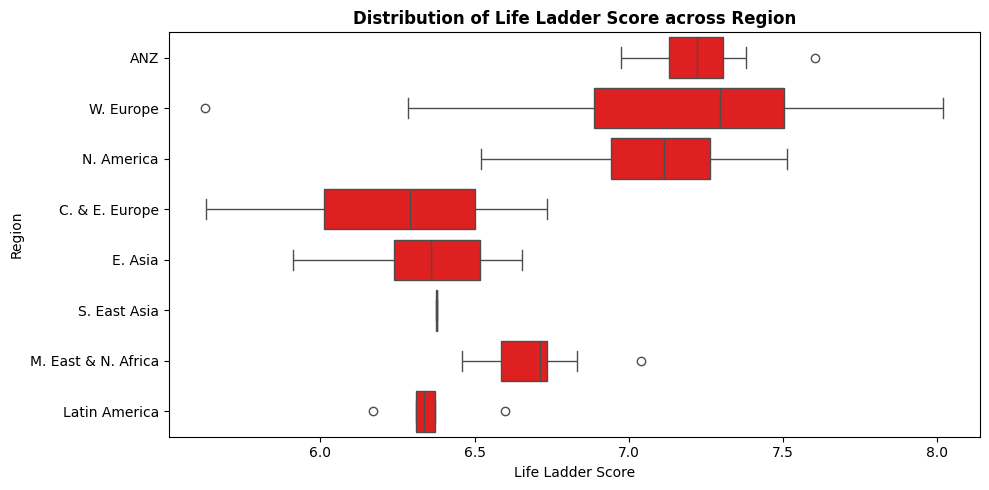

In [46]:
filter = True

for col, value in [(col, df[col].unique()[-1]) for col in categorical_cols[2:]]:
    filter &= (df[col] == value)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[filter], x='Life Ladder Score', y='Region', color='red')
plt.title('Distribution of Life Ladder Score across Region', fontweight='bold')
plt.tight_layout()

- When all the Socioeconomic and Governance metrics are higher, Countries are showing high Life Ladder Score.

#### Life Ladder Score by Country

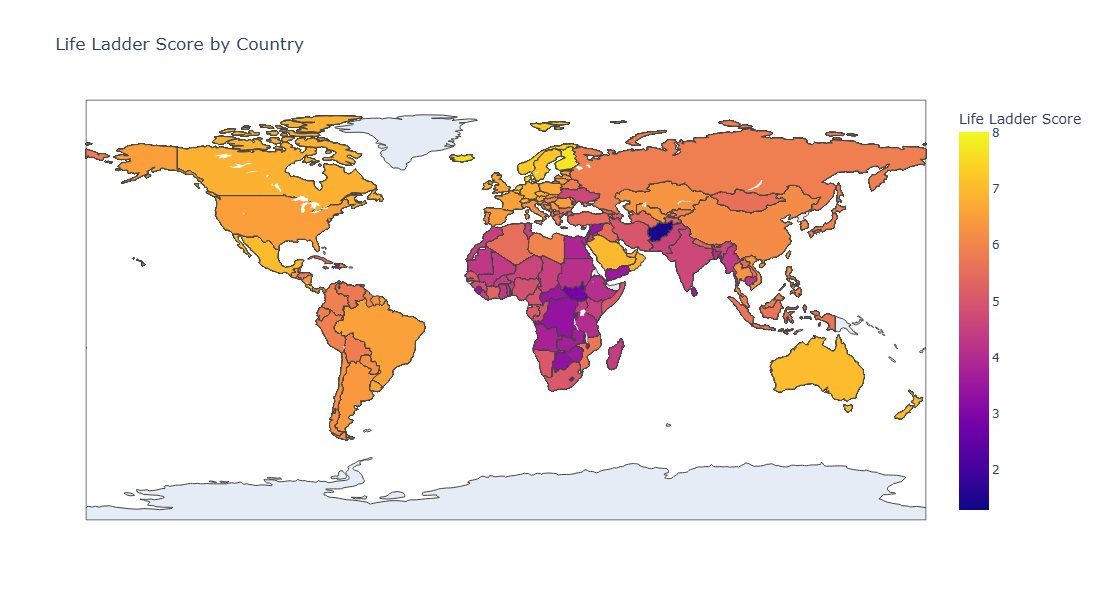

In [156]:
import plotly.express as px

fig = px.choropleth(
        df,
        locations="Country",
        locationmode="country names",
        color="Life Ladder Score",
        hover_name="Country",
        title="Life Ladder Score by Country",
        color_continuous_scale=px.colors.sequential.Plasma,
        width=1100,
        height=600
)

fig.show()

- Choropleth chart shows,
    - North American, South American, European, ANZ, and Russian regions shows high Life Ladder Score.
    - Afican and South Asian Countries shows a below average Life Ladder Score.

#### Average Life Ladder Score across Year

In [51]:
from scipy.stats import f_oneway

anova_result = f_oneway(*[df[df['Year'] == year]['Life Ladder Score'] for year in df['Year'].unique()])

if anova_result.pvalue < 0.05:
    print('There is a significant difference between the mean of Life Ladder Score across Year')
else:
    print('There is no significant difference between the mean of Life Ladder Score across Year')

There is a significant difference between the mean of Life Ladder Score across Year


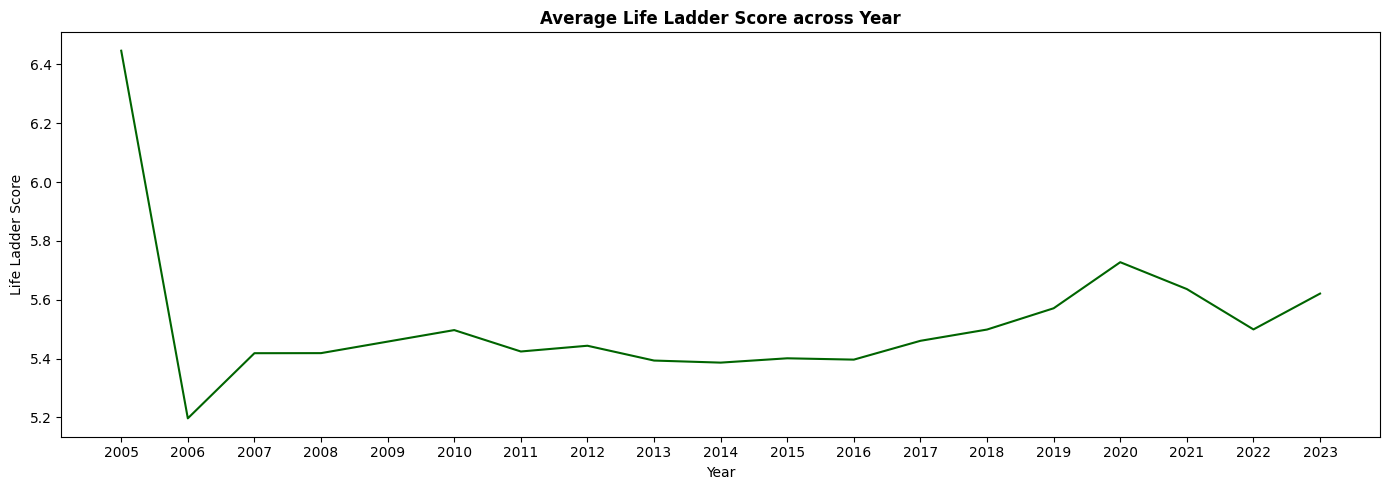

In [52]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='Year', y='Life Ladder Score', errorbar=None, color='darkgreen')
plt.title('Average Life Ladder Score across Year', fontweight='bold')
plt.xticks(df['Year'].unique())
plt.tight_layout()

- The trend highlights the potential impact of global economic events on the Life Ladder Score, with signs of resilience and recovery post-2006.

- From 2020 to 2022 sudden fall in score denotes the covid era.

- Further analysis could identify specific factors or events contributing to this pattern.

In [54]:
df['Year'].value_counts()

Year
2017.0    147
2011.0    146
2014.0    144
2019.0    143
2015.0    142
2012.0    141
2016.0    141
2018.0    141
2022.0    140
2023.0    138
2013.0    136
2010.0    124
2021.0    122
2020.0    116
2009.0    114
2008.0    110
2007.0    102
2006.0     89
2005.0     27
Name: count, dtype: int64

- The dataset has imbalanced samples across years. Considering a weighted average would be the right choice.

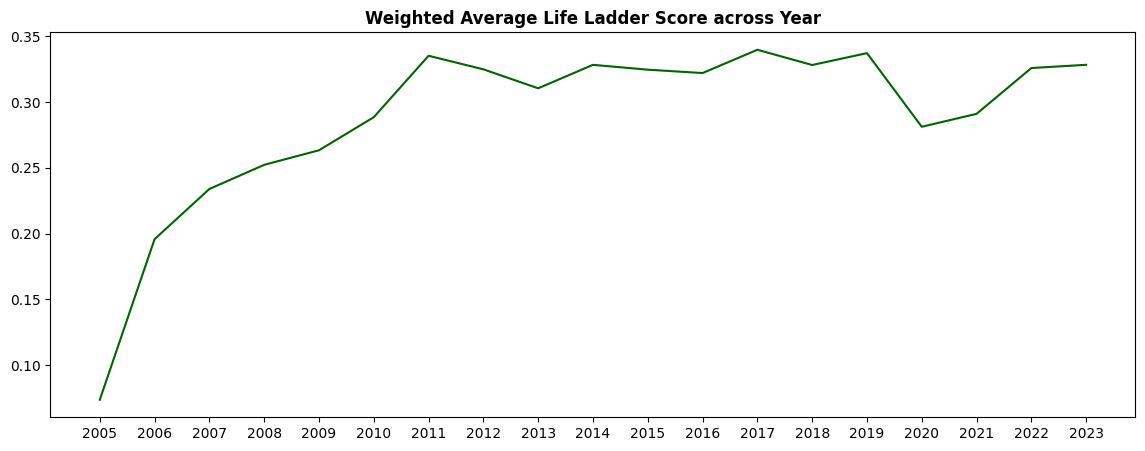

In [56]:
weights = df['Year'].value_counts(normalize=True)

weighted_scores = df.groupby('Year')['Life Ladder Score'].apply(lambda x: x.mean() * weights[x.name])

plt.figure(figsize=(14, 5))
plt.plot(weighted_scores, color='darkgreen')
plt.title('Weighted Average Life Ladder Score across Year', fontweight='bold')
plt.xticks(weighted_scores.index)
plt.show()

- The above line plot shows that `Life Ladder Score` is consistently increasing across `Year` and a mild dip in 2019 might be due to COVID-19 era. 

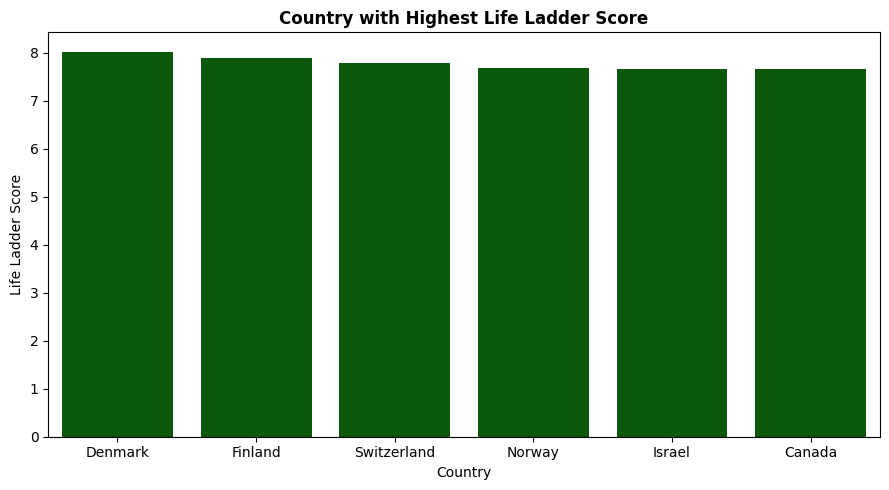

In [58]:
country = df.groupby('Country')['Life Ladder Score'].max().sort_values(ascending=False)[:6]
plt.figure(figsize=(9, 5))
sns.barplot(country, color='darkgreen')
plt.title('Country with Highest Life Ladder Score', fontweight='bold')
plt.tight_layout()

- Most of the countries are European Countries (Denmark, Finland, Switzerland, Norway)

- Even though a war prone area Israel is one of the Country with highest `Life Ladder Score`. 

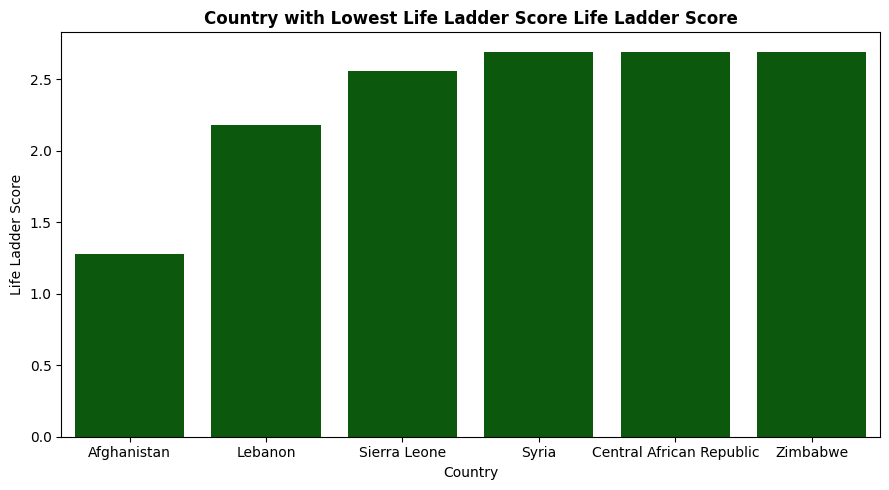

In [60]:
country = df.groupby('Country')['Life Ladder Score'].min().sort_values()[:6]
plt.figure(figsize=(9, 5))
sns.barplot(country, color='darkgreen')
plt.title('Country with Lowest Life Ladder Score Life Ladder Score', fontweight='bold')
plt.tight_layout()

- Most of the countries are African and middle east countries which having lowest `Life Ladder Score`

#### Life Ladder Scores across Region by Year

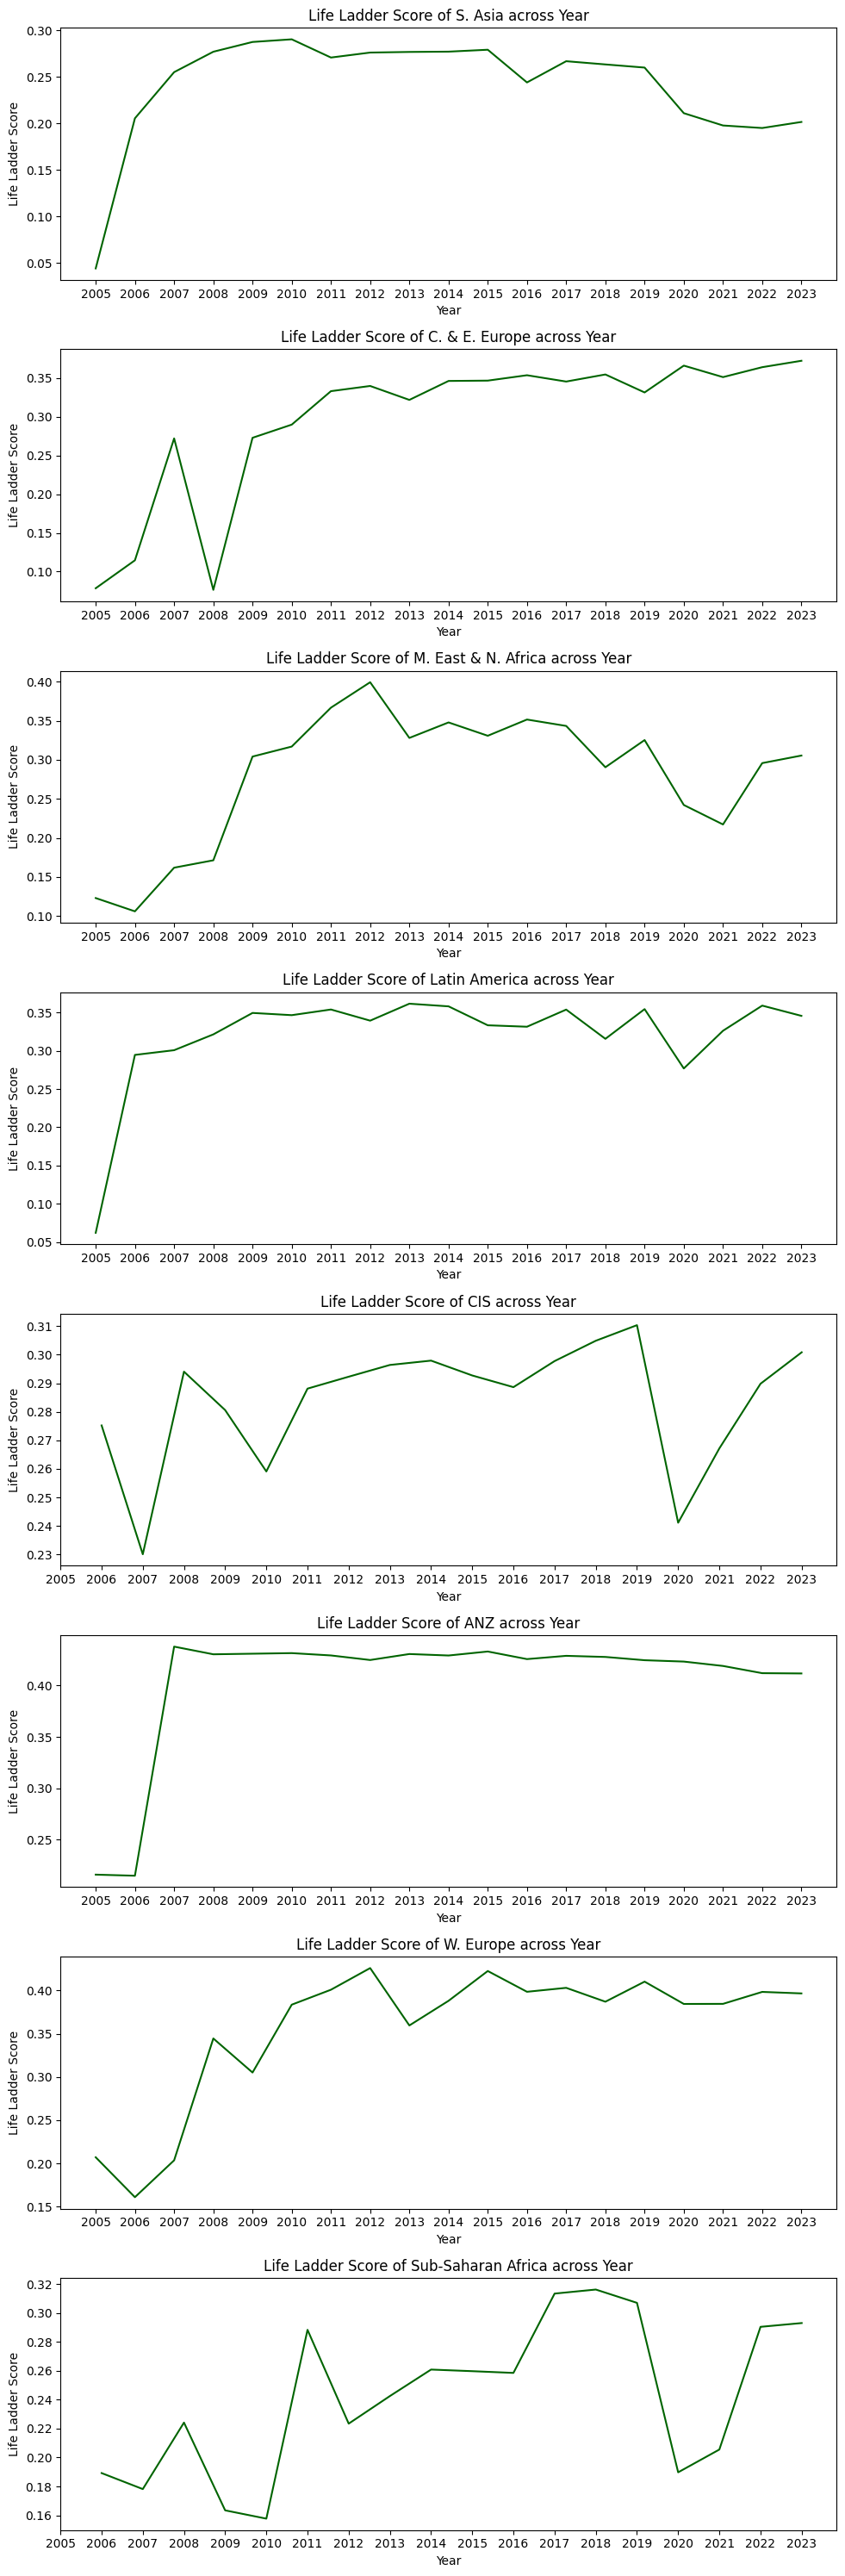

In [63]:
fig, axes = plt.subplots(8, 1, figsize=(10, 30))
axes = axes.flatten()

for value, axis in zip(df['Region'].unique(), axes):
    region_df = df[df['Region'] == value]
    weights = region_df['Year'].value_counts(normalize=True)
    weighted_avg = region_df.groupby('Year')['Life Ladder Score'].apply(lambda x: x.mean() * weights[x.name])

    sns.lineplot(weighted_avg, color='darkgreen', ax=axis)
    axis.set_title(f'Life Ladder Score of {value} across Year')
    axis.set_xticks(df['Year'].unique())

plt.tight_layout()
plt.show()

- The countries in Region of Africa and South Asia are fluctuating in the Life Ladder Score over the Year. 

#### Multivariate Analysis 

#### Clustering

In [113]:
corr = df[numerical_cols].corr().drop('Life Ladder Score').loc[:, 'Life Ladder Score']
corr[corr > 0.7]

Log GDP per capita         0.784618
Log GNI per capita         0.806077
Social Support             0.723031
Healthy Life Expectancy    0.710677
Name: Life Ladder Score, dtype: float64

- Utilized features with high correlation scores with the `Life Ladder Score` for clustering to perform multivariate analysis.

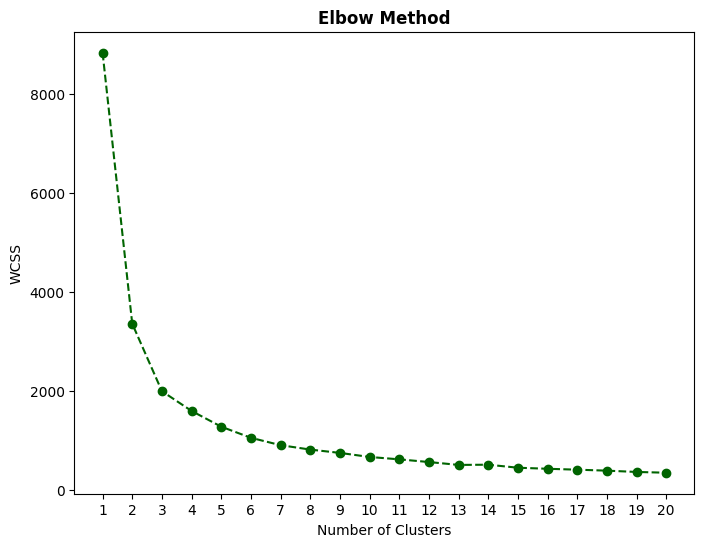

In [115]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(df[corr[corr > 0.7].index])

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

wcss = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(pca_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--', color='darkgreen')
plt.title("Elbow Method", fontweight='bold')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(range(1, 21))
plt.show()

- As hierarchical clustering will be computationally expensive compared to K-Means, utilized K-Means due to it's efficency, scalability, and sufficient for most practical applications at this dataset size. 
  
- The optimal number of clusters can be considered as 15, as beyond this point, the curve flattens.

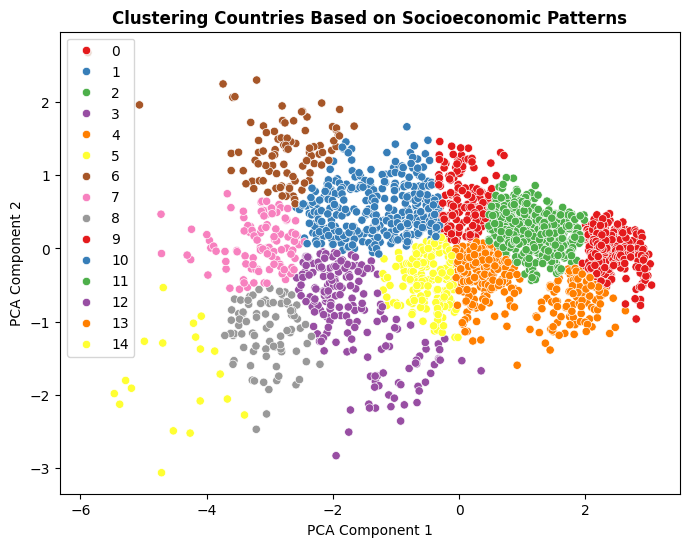

In [117]:
model = KMeans(n_clusters=15, random_state=42)
clusters = model.fit_predict(pca_data)

pca_data = pd.DataFrame(pca_data, columns=['PCA 1', 'PCA 2'])

df['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data['PCA 1'], y=pca_data['PCA 2'], hue=clusters, palette='Set1')
plt.title("Clustering Countries Based on Socioeconomic Patterns", fontweight='bold')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

- As the features are highly correlated and the aim is to capture the variance in the data with fewer components utilized Principle Component Analysis (PCA).

In [158]:
from scipy.stats import f_oneway

f_stats, p_value = f_oneway(*[df[df['Cluster'] == i]['Life Ladder Score'] for i in df['Cluster'].unique()])

if p_value < 0.05:
    print('There is a significant difference in Life Ladder Score across Clusters')
else:
    print('There is no significant difference in Life Ladder Score across Clusters')

There is a significant difference in Life Ladder Score across Clusters


In [69]:
df_new = df[df['Cluster'] == 0]
cat_col = df_new.drop(columns='Country').select_dtypes(include='O').columns
num_col = df_new.drop(columns='Year').select_dtypes(exclude='O').columns

print('Categorical Features\n')

for col in cat_col:
    print(f'{col:>30} : {df_new[col].mode()[0]}')
    
print('\nNumerical Features\n')

for col in num_col:
    print(f'{col:>30} : {df_new[col].mean().round(2)}')

Categorical Features

                        Region : W. Europe
            GNI Classification : High Income
             Population Growth : Low Growth
      Voice and Accountability : Empowered
           Political Stability : Peaceful
      Government Effectiveness : Efficient
            Regulatory Quality : Progressive
                   Rule of Law : Just
          Internet Penetration : High Penetration
          Child Mortality Rate : Low

Numerical Features

            Log GDP per capita : 10.85
            Log GNI per capita : 10.78
              Total Population : 38419410.39
    Population Growth Rate (%) : 1.06
                Social Support : 0.93
       Healthy Life Expectancy : 70.78
  Freedom to Make Life Choices : 0.87
                    Generosity : 0.11
     Perceptions of Corruption : 0.5
               Positive Affect : 0.72
               Negative Affect : 0.23
             Life Ladder Score : 7.02
                       Cluster : 0.0


In [166]:
df_new = df[df['Cluster'] == 7]
cat_col = df_new.drop(columns='Country').select_dtypes(include='O').columns
num_col = df_new.drop(columns='Year').select_dtypes(exclude='O').columns

print('Categorical Features\n')

for col in cat_col:
    print(f'{col:>30} : {df_new[col].mode()[0]}')
    
print('\nNumerical Features\n')

for col in num_col:
    print(f'{col:>30} : {df_new[col].mean().round(2)}')

Categorical Features

                        Region : Sub-Saharan Africa
            GNI Classification : Low Income
             Population Growth : High Growth
      Voice and Accountability : Limited Freedom
           Political Stability : Fragile
      Government Effectiveness : Developing
            Regulatory Quality : Inconsistent
                   Rule of Law : Vulnerable
          Internet Penetration : Low Penetration
          Child Mortality Rate : High

Numerical Features

            Log GDP per capita : 7.38
            Log GNI per capita : 6.41
              Total Population : 19890994.71
    Population Growth Rate (%) : 2.82
                Social Support : 0.65
       Healthy Life Expectancy : 52.03
  Freedom to Make Life Choices : 0.69
                    Generosity : 0.04
     Perceptions of Corruption : 0.77
               Positive Affect : 0.63
               Negative Affect : 0.33
             Life Ladder Score : 4.24
                       Cluster : 7.0


In [70]:
df_new = df[df['Cluster'] == 14]
cat_col = df_new.drop(columns='Country').select_dtypes(include='O').columns
num_col = df_new.drop(columns='Year').select_dtypes(exclude='O').columns

print('Categorical Features\n')

for col in cat_col:
    print(f'{col:>30} : {df_new[col].mode()[0]}')
    
print('\nNumerical Features\n')

for col in num_col:
    print(f'{col:>30} : {df_new[col].mean().round(2)}')

Categorical Features

                        Region : Sub-Saharan Africa
            GNI Classification : Low Income
             Population Growth : High Growth
      Voice and Accountability : Oppressed
           Political Stability : Conflict-Prone
      Government Effectiveness : Inefficient
            Regulatory Quality : Restrictive
                   Rule of Law : Lawless
          Internet Penetration : Low Penetration
          Child Mortality Rate : High

Numerical Features

            Log GDP per capita : 7.2
            Log GNI per capita : 6.08
              Total Population : 24700053.74
    Population Growth Rate (%) : 2.78
                Social Support : 0.38
       Healthy Life Expectancy : 50.46
  Freedom to Make Life Choices : 0.5
                    Generosity : -0.01
     Perceptions of Corruption : 0.82
               Positive Affect : 0.47
               Negative Affect : 0.37
             Life Ladder Score : 3.19
                       Cluster : 14.0


- From the above codes, we can clearly see the transition between the best country and the worst country.

- We can confrim that `Cluster == 0` denotes Countries with high development metrics and `Cluster == 14` denotes Countries with low development metrics. 

### Feature Engineering

#### Label Encoding

In [176]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [185]:
df.head()

,Country,Region,Year,Log GDP per capita,Log GNI per capita,GNI Classification,Total Population,Population Growth Rate (%),Population Growth,Voice and Accountability,Political Stability,Government Effectiveness,Regulatory Quality,Rule of Law,Internet Penetration,Social Support,Healthy Life Expectancy,Child Mortality Rate,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Positive Affect,Negative Affect,Life Ladder Score,Cluster
0,0,7,2008.0,7.350,5.913503,1,26427199.0,2.0,0,2,0,2,2,1,1,0.451,50.5,0,0.718,0.164,0.882,0.414,0.258,3.724,14
1,0,7,2009.0,7.509,6.131226,1,27385307.0,3.6,0,2,0,2,2,1,1,0.552,50.8,0,0.679,0.187,0.850,0.481,0.237,4.402,7
2,0,7,2010.0,7.614,6.272877,1,28189672.0,2.9,0,2,0,2,2,1,1,0.539,51.1,0,0.600,0.118,0.707,0.517,0.275,4.758,8
3,0,7,2011.0,7.581,6.309918,1,29249157.0,3.7,0,2,0,2,2,1,1,0.521,51.4,0,0.496,0.160,0.731,0.480,0.267,3.832,8
4,0,7,2012.0,7.661,6.461468,1,30466479.0,4.1,0,2,0,2,2,1,1,0.521,51.7,0,0.531,0.234,0.776,0.614,0.268,3.783,8
